# Copulas

### Define model

First, let's import the necessary classes:

In [454]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, CorrelationType, CopulaType

In [455]:
from utils.models import hunt

In [456]:
project = ReliabilityProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


In [457]:
project.variables["t_p"].distribution = DistributionType.uniform
project.variables["t_p"].minimum = 0.01
project.variables["t_p"].maximum = 3.0

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0.01
project.variables["h_s"].maximum = 3.0

project.variables["h_crest"].distribution = DistributionType.deterministic
project.variables["h_crest"].mean = 3.0

project.variables["h"].distribution = DistributionType.deterministic
project.variables["h"].mean = 1.0

### Define reliability method

In [458]:
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.minimum_samples = 10000
project.settings.maximum_samples = 10000
project.settings.variation_coefficient = 0.05
project.settings.save_realizations = True

### Gaussian

Reliability:
 Reliability index = 1.992
 Probability of failure = 0.0232
 Convergence = 0.06489 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.911, x = 2.896
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.4124, x = 2.842
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

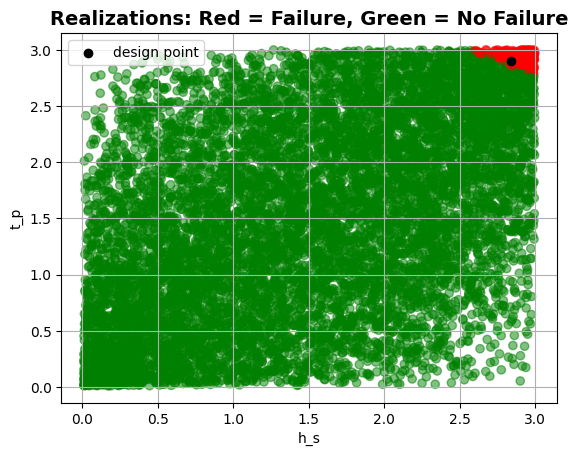

In [459]:
par = 0.5 # tussen [-1, 1]

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.gaussian)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()


### Gumbel

Reliability:
 Reliability index = 1.616
 Probability of failure = 0.0531
 Convergence = 0.04223 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -1, x = 2.841
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = 0.001572, x = 2.841
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

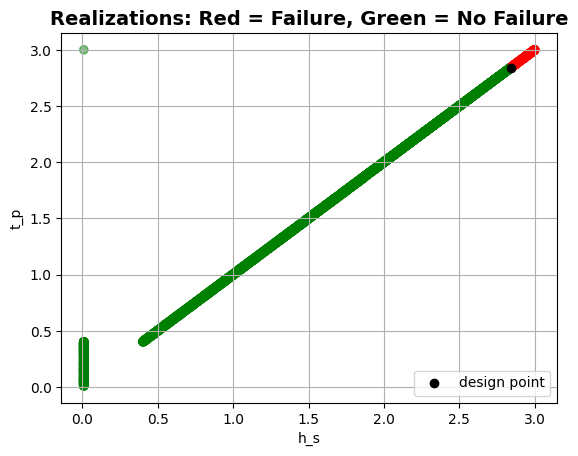

In [460]:
par = 1000.0 # >= 1

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.gumbel)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()

# why the name of the parameter is alpha value? this is confusing? why not theta?

### Clayton

Reliability:
 Reliability index = 1.253
 Probability of failure = 0.1051
 Convergence = 0.0409 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -1, x = 2.686
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.002824, x = 2.686
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

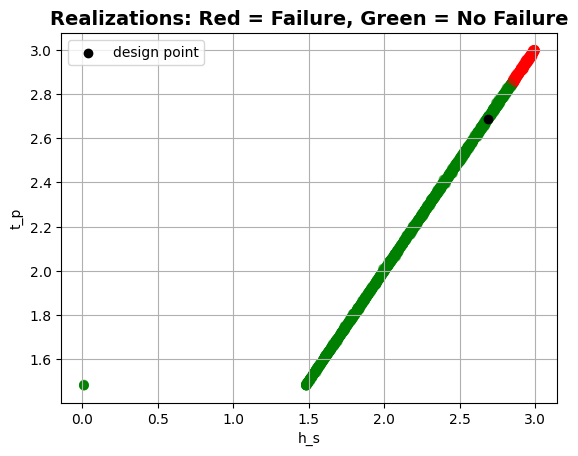

In [461]:
par = 1000.0 # [-1, inf)\{0}

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.clayton)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()

### Frank

Reliability:
 Reliability index = 40
 Probability of failure = 0
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.7071, x = 3
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.7071, x = 0.01
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

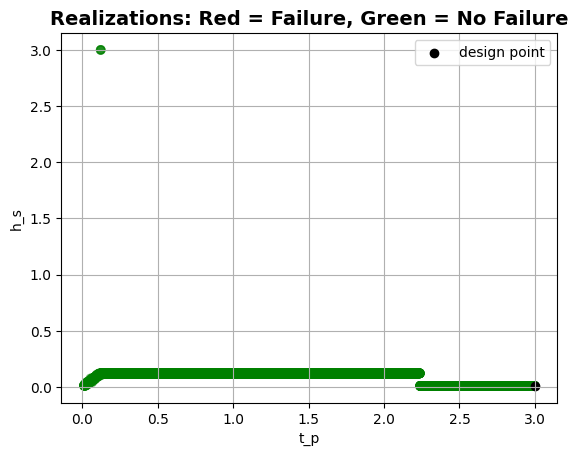

In [462]:
par = 1000.0 # (-inf, inf)\{0}

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.frank)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()

Error: Multiple correlations not allowed for copulas, found for correlations t_p-h and t_p-h_s
Error: Multiple correlations not allowed for copulas, found for correlations t_p-h and h_crest-h
Reliability:
 Reliability index = 1.196
 Probability of failure = 0.1158
 Convergence = 0.02763 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.9766, x = 2.637
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.07262, x = 2.629
 h_crest: alpha = -0.1113, x = 3.055
 h: alpha = -0.1692, x = 1.3



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

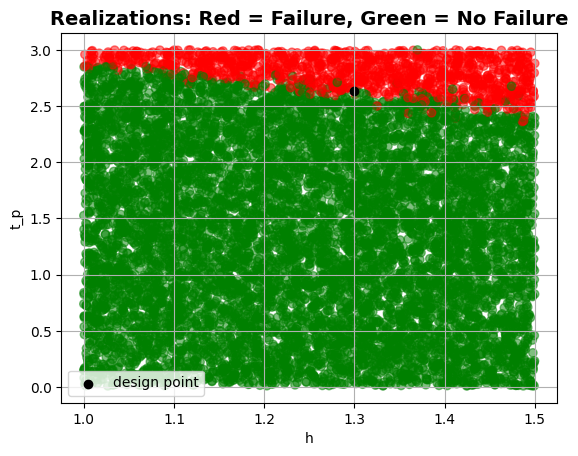

In [466]:
project.variables["t_p"].distribution = DistributionType.uniform
project.variables["t_p"].minimum = 0.01
project.variables["t_p"].maximum = 3.0

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0.01
project.variables["h_s"].maximum = 3.0

project.variables["h_crest"].distribution = DistributionType.uniform
project.variables["h_crest"].minimum = 3.0
project.variables["h_crest"].maximum = 3.1

project.variables["h"].distribution = DistributionType.uniform
project.variables["h"].minimum = 1.0
project.variables["h"].maximum = 1.5

par = 5.0 # >= 1

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.gumbel)

project.copulas["h_crest", "h"] = (par, CopulaType.frank)

project.copulas["t_p", "h"] = (par, CopulaType.frank)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()